
### Projeto do Módulo Técnicas de Programação em Python: O Objetivo é realizar uma análise exploratória de dados utilizando datasets relacionados ao Brasil. Você está livre para incluir quantas bases considerar necessário e filtrar as informações mais relevantes para sua história.  

**PROJETO DESENVOLVIDO PELOS ALUNOS: Leandro Republicano, Leticia da Luz e Orestes Dos Santos.**


#O objetivo do nosso estudo é analisar o padrão de preferência de gêneros de filmes entre os brasileiros, com base nos dados disponibilizados pela Netflix. Além disso, pretendemos investigar se essa preferência varia ao longo do tempo, como, por exemplo, durante as férias escolares. Vamos também tirar outros insights como quais os filmes que ficaram por mais tempo nos TOP 10 (por mais de uma semana) e qual o tempo médio de duração dos filmes assistidos.


**O arquivo que contém as listas semanais dos títulos mais assistidos na Netflix em todo o mundo por país, está no drive e é denominado "all-weeks-countries.xlsx" e foi atualizado pela última vez em 05/02/2024. Ele também está disponível através do seguinte link: https://www.netflix.com/tudum/top10/. Ao final da página, é possível fazer o download do arquivo.**
- **Obs.: Os dados começaram a ser coletados em 28 de junho de 2021.**

**Quanto ao arquivo que contém a lista de todos os filmes mundiais, juntamente com as características mais relevantes de cada filme, esta no drive com o nome de "data.tsv". Ele pode ser acessado através do link: https://developer.imdb.com/non-commercial-datasets/. O site da IMDb oferece arquivos interessantes sobre todos os filmes mundiais, e todas as listas são atualizadas diariamente. No início da página, é informado que você pode clicar no link https://datasets.imdbws.com/ para realizar o download dos arquivos de interesse. Para o nosso estudo, optamos pelo arquivo 'title.basics.tsv.gz'.**



Caminho dos arquivos para cada um dos integrantes:

- Leticia - Netflix_Corrigido:  '/content/drive/My Drive/Colab Notebooks/dados_netflix/filmes_netflix_corrigido.csv'
- Orestes - Netflix_Corrigido: "/content/drive/MyDrive/Projeto_ADA_Netflix/...
- Leandro -

In [ ]:
#Importação de bibliotecas
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho do arquivo da Netflix (trocar conforme integrante)
caminho_csv = '/content/drive/My Drive/Colab Notebooks/dados_netflix/filmes_netflix_corrigido.csv'

In [ ]:
# Carregando o arquivo CSV usando Pandas
netflix_corrigido = pd.read_csv(caminho_csv)

In [ ]:
display(netflix_corrigido)

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo
0,Brazil,2024-02-04,Orion and the Dark,Orion and the Dark,2024,93.0,"Adventure,Animation,Comedy",Filmes Médios
1,Brazil,2024-02-04,The Greatest Night in Pop,The Greatest Night in Pop,2024,96.0,"Documentary,Music",Filmes Médios
2,Brazil,2024-02-04,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",Filmes Médios
3,Brazil,2024-02-04,Despicable Me 3,Despicable Me 3,2017,89.0,"Adventure,Animation,Comedy",Filmes Médios
4,Brazil,2024-01-28,Deepwater Horizon,Deepwater Horizon,2016,107.0,"Action,Drama,History",Filmes Longos
...,...,...,...,...,...,...,...,...
1260,Brazil,2021-07-11,The Water Man,The Water Man,2020,91.0,"Adventure,Drama,Family",Filmes Médios
1261,Brazil,2021-07-04,Silver Skates,Serebryanye konki,2020,130.0,"Adventure,Drama,Family",Filmes Longos
1262,Brazil,2021-07-04,What Men Want,What Men Want,2019,117.0,"Comedy,Fantasy,Romance",Filmes Longos
1263,Brazil,2021-07-04,Kung Fu Panda 3,Kung Fu Panda 3,2016,95.0,"Action,Adventure,Animation",Filmes Médios


In [ ]:
# Conte as combinações únicas na coluna 'genres'
contagem_combinacoes = netflix_corrigido['generos'].value_counts()

In [ ]:
#Salvando as 10 principais combinações
contagem_combinacoes = contagem_combinacoes.head(10)

In [ ]:
contagem_combinacoes

Comedy,Romance                78
Adventure,Animation,Comedy    77
Drama                         65
Action,Crime,Drama            51
Drama,Romance                 48
Action,Crime,Thriller         46
Action,Adventure,Comedy       39
Action,Comedy,Crime           38
Comedy                        38
Crime,Drama,Mystery           37
Name: generos, dtype: int64

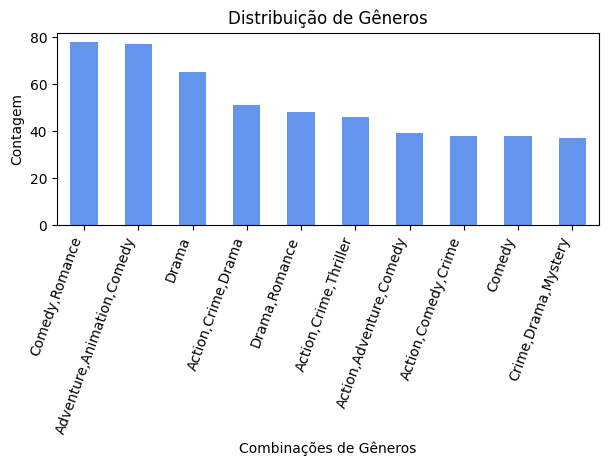

In [ ]:
plt.figure(figsize=(7, 2.5))
contagem_combinacoes.plot(kind='bar', color = 'CornflowerBlue')
plt.title('Distribuição de Gêneros')
plt.xlabel('Combinações de Gêneros')
plt.ylabel('Contagem')
plt.xticks(rotation=70, ha='right')
plt.show()

### Vamos usar a biblioteca wordcloud para mostrar os termos mais comuns da coluna gênero:

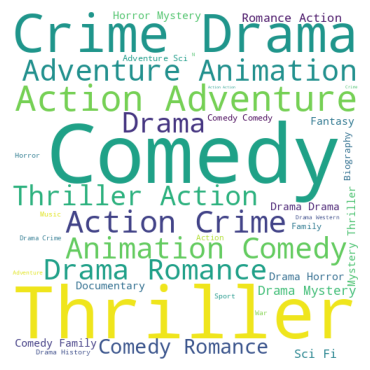

In [ ]:
# Criando a nuvem de palavras a partir da coluna genero
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = None,
                min_font_size = 5).generate(' '.join(netflix_corrigido['generos']))

# Visualizando a nuvem de palavras
plt.figure(figsize = (3.5, 3.5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

#Top filmes por ano

In [ ]:
#Convertendo a coluna semana para o formato correto
netflix_corrigido['semana'] = pd.to_datetime(netflix_corrigido['semana'])

# mostrando o mes de cada data
netflix_corrigido['mes'] = netflix_corrigido['semana'].dt.month

In [ ]:
netflix_corrigido.head()

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo,mes
0,Brazil,2024-02-04,Orion and the Dark,Orion and the Dark,2024,93.0,"Adventure,Animation,Comedy",Filmes Médios,2
1,Brazil,2024-02-04,The Greatest Night in Pop,The Greatest Night in Pop,2024,96.0,"Documentary,Music",Filmes Médios,2
2,Brazil,2024-02-04,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",Filmes Médios,2
3,Brazil,2024-02-04,Despicable Me 3,Despicable Me 3,2017,89.0,"Adventure,Animation,Comedy",Filmes Médios,2
4,Brazil,2024-01-28,Deepwater Horizon,Deepwater Horizon,2016,107.0,"Action,Drama,History",Filmes Longos,1


In [ ]:
# Dicionário de mapeamento de meses
meses_dic = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

In [ ]:
# Adicionando uma nova coluna 'nome_mes' com os nomes dos meses em formato de texto
netflix_corrigido['nome_mes'] = netflix_corrigido['mes'].map(meses_dic)

In [ ]:
netflix_corrigido.head()

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo,mes,nome_mes
0,Brazil,2024-02-04,Orion and the Dark,Orion and the Dark,2024,93.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
1,Brazil,2024-02-04,The Greatest Night in Pop,The Greatest Night in Pop,2024,96.0,"Documentary,Music",Filmes Médios,2,Fevereiro
2,Brazil,2024-02-04,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
3,Brazil,2024-02-04,Despicable Me 3,Despicable Me 3,2017,89.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
4,Brazil,2024-01-28,Deepwater Horizon,Deepwater Horizon,2016,107.0,"Action,Drama,History",Filmes Longos,1,Janeiro


In [ ]:
# Filtrar os dados para incluir apenas os dados de 2021
ano_2021 = netflix_corrigido[netflix_corrigido['semana'].dt.year == 2021]

# Agrupar os dados pelo mês e encontrar os principais títulos em cada mês
top_titulos_2021 = ano_2021.groupby(['mes', 'nome_mes'])['titulo'].apply(lambda x: x.value_counts().head(1))

# Exibir os principais títulos em cada mês em 2021
display(top_titulos_2021)


mes  nome_mes                           
7    Julho     Major Grom: Plague Doctor    3
8    Agosto    Vivo                         6
9    Setembro  The Stronghold               6
10   Outubro   Venom                        8
11   Novembro  The Harder They Fall         3
12   Dezembro  Back to the Outback          3
Name: titulo, dtype: int64

Os dados começaram a ser coletados em 28 de junho de 2021, por isto, o primeiro mês é Julho

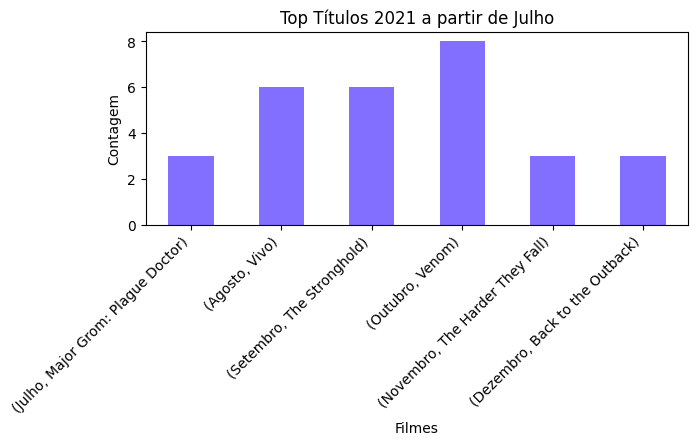

In [ ]:
# Reindexando a série usando apenas 'nome_mes' como índice
top_titulos_sem_mes_2021 = top_titulos_2021.reset_index(level='mes', drop=True)

# Criando o gráfico
plt.figure(figsize=(7, 2.5))
top_titulos_sem_mes_2021.plot(kind='bar', color='#836FFF')

# Configurações do gráfico
plt.title('Top Títulos 2021 a partir de Julho')
plt.xlabel('Filmes')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filtrar os dados para incluir apenas os dados de 2022
ano_2022 = netflix_corrigido[netflix_corrigido['semana'].dt.year == 2022]

# Agrupar os dados pelo mês e encontrar os principais títulos em cada mês
top_titulos_2022 = ano_2022.groupby(['mes', 'nome_mes'])['titulo'].apply(lambda x: x.value_counts().head(1))

# Exibir os principais títulos em cada mês em 2022
display(top_titulos_2022)

mes  nome_mes                                          
1    Janeiro    A Quiet Place                              4
2    Fevereiro  Abominable                                 4
3    Março      Trust                                      8
4    Abril      Escape Room                                3
5    Maio       Toscana                                    4
6    Junho      Chickenhare and the Hamster of Darkness    3
7    Julho      Forsaken                                   7
8    Agosto     Day Shift                                  3
9    Setembro   The Invisible Man                          6
10   Outubro    The Hunt                                   8
11   Novembro   War                                        3
12   Dezembro   Lady Chatterley's Lover                    4
Name: titulo, dtype: int64

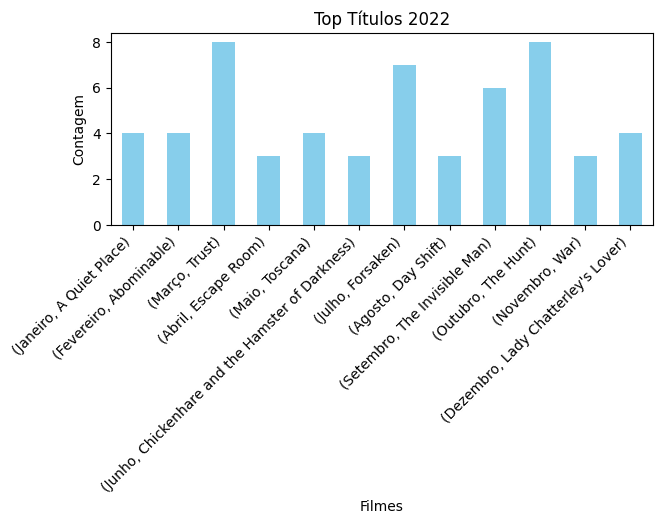

In [ ]:
# Reindexando a série usando apenas 'nome_mes' como índice
top_titulos_sem_mes_2022 = top_titulos_2022.reset_index(level='mes', drop=True)

# Criando o gráfico
plt.figure(figsize=(7, 2.5))
top_titulos_sem_mes_2022.plot(kind='bar', color='#87CEEB')

# Configurações do gráfico
plt.title('Top Títulos 2022')
plt.xlabel('Filmes')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filtrar os dados para incluir apenas os dados de 2023
ano_2023 = netflix_corrigido[netflix_corrigido['semana'].dt.year == 2023]

# Agrupar os dados pelo mês e encontrar os principais títulos em cada mês
top_titulos_2023 = ano_2023.groupby(['mes', 'nome_mes'])['titulo'].apply(lambda x: x.value_counts().head(1))

# Exibir os principais títulos em cada mês em 2022
display(top_titulos_2023)

mes  nome_mes                   
1    Janeiro    Vengeance            6
2    Fevereiro  Unlocked             4
3    Março      Noise                6
4    Abril      Home                 4
5    Maio       The Father           5
6    Junho      Extraction           8
7    Julho      Woody Woodpecker     5
8    Agosto     Paradise             6
9    Setembro   Choose Love          4
10   Outubro    Nowhere              9
11   Novembro   Locked In            6
12   Dezembro   Leo                 10
Name: titulo, dtype: int64

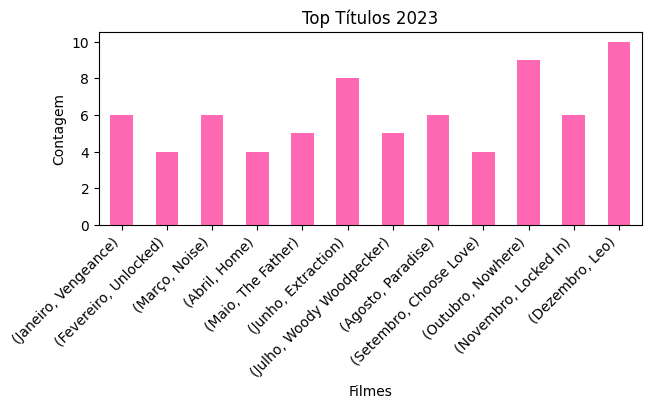

In [ ]:
# Reindexando a série usando apenas 'nome_mes' como índice
top_titulos_sem_mes_2023 = top_titulos_2023.reset_index(level='mes', drop=True)

# Criando o gráfico
plt.figure(figsize=(7, 2.5))
top_titulos_sem_mes_2023.plot(kind='bar', color='#FF69B4')

# Configurações do gráfico
plt.title('Top Títulos 2023')
plt.xlabel('Filmes')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filtrar os dados para incluir apenas os dados de 2024
ano_2024 = netflix_corrigido[netflix_corrigido['semana'].dt.year == 2024]

# Agrupar os dados pelo mês e encontrar os principais títulos em cada mês
top_titulos_2024 = ano_2024.groupby(['mes', 'nome_mes'])['titulo'].apply(lambda x: x.value_counts().head(1))

# Exibir os principais títulos em cada mês em 2022
display(top_titulos_2024)

mes  nome_mes              
1    Janeiro    Wild           8
2    Fevereiro  Finding You    2
Name: titulo, dtype: int64

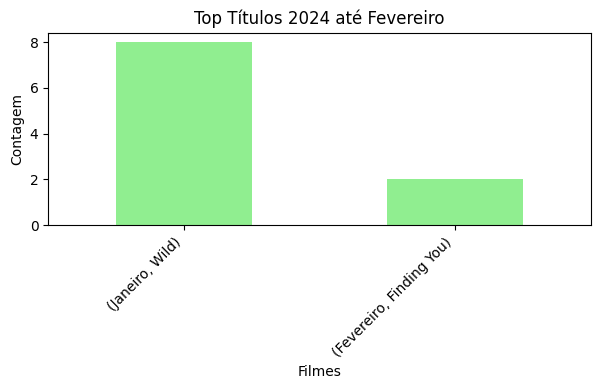

In [ ]:
# Reindexando a série usando apenas 'nome_mes' como índice
top_titulos_sem_mes_2024 = top_titulos_2024.reset_index(level='mes', drop=True)

# Criando o gráfico
plt.figure(figsize=(7, 2.5))
top_titulos_sem_mes_2024.plot(kind='bar', color='#90EE90')

# Configurações do gráfico
plt.title('Top Títulos 2024 até Fevereiro')
plt.xlabel('Filmes')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

## Agora vamos criar um gráfico para verificar qual faixa de tempo em relação a duração dos filmes é mais comum

In [ ]:
#Verificando valores nulos na coluna faixa tempo
netflix_corrigido['faixa_tempo'].isnull().sum()

58

In [ ]:
#Criando um novo DF sem os valores nulos
faixa_tempo = netflix_corrigido.dropna(subset=['faixa_tempo'])

In [ ]:
faixa_tempo.head()

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo,mes,nome_mes
0,Brazil,2024-02-04,Orion and the Dark,Orion and the Dark,2024,93.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
1,Brazil,2024-02-04,The Greatest Night in Pop,The Greatest Night in Pop,2024,96.0,"Documentary,Music",Filmes Médios,2,Fevereiro
2,Brazil,2024-02-04,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
3,Brazil,2024-02-04,Despicable Me 3,Despicable Me 3,2017,89.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
4,Brazil,2024-01-28,Deepwater Horizon,Deepwater Horizon,2016,107.0,"Action,Drama,History",Filmes Longos,1,Janeiro


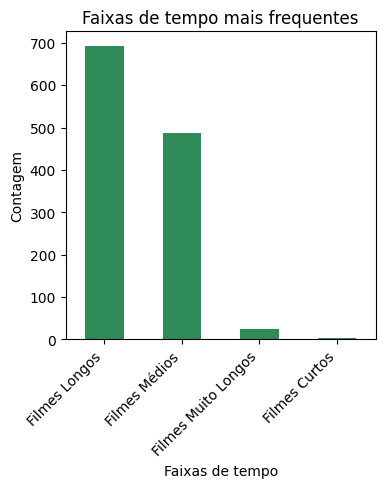

In [ ]:
plt.figure(figsize=(4, 4))
faixa_tempo['faixa_tempo'].value_counts().plot(kind='bar', color='#2E8B57')
plt.title('Faixas de tempo mais frequentes')
plt.xlabel('Faixas de tempo')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

#Verificando a diferença por meses de férias escolares
- Vamos voltar com o dataset original netflix_corrigido

In [ ]:
display(netflix_corrigido)

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo,mes,nome_mes
0,Brazil,2024-02-04,Orion and the Dark,Orion and the Dark,2024,93.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
1,Brazil,2024-02-04,The Greatest Night in Pop,The Greatest Night in Pop,2024,96.0,"Documentary,Music",Filmes Médios,2,Fevereiro
2,Brazil,2024-02-04,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
3,Brazil,2024-02-04,Despicable Me 3,Despicable Me 3,2017,89.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
4,Brazil,2024-01-28,Deepwater Horizon,Deepwater Horizon,2016,107.0,"Action,Drama,History",Filmes Longos,1,Janeiro
...,...,...,...,...,...,...,...,...,...,...
1260,Brazil,2021-07-11,The Water Man,The Water Man,2020,91.0,"Adventure,Drama,Family",Filmes Médios,7,Julho
1261,Brazil,2021-07-04,Silver Skates,Serebryanye konki,2020,130.0,"Adventure,Drama,Family",Filmes Longos,7,Julho
1262,Brazil,2021-07-04,What Men Want,What Men Want,2019,117.0,"Comedy,Fantasy,Romance",Filmes Longos,7,Julho
1263,Brazil,2021-07-04,Kung Fu Panda 3,Kung Fu Panda 3,2016,95.0,"Action,Adventure,Animation",Filmes Médios,7,Julho


In [ ]:
# Definindo os meses de férias
meses_ferias = [12, 1, 2, 7]

In [ ]:
#Divindo o Dataset
netflix_ferias = netflix_corrigido[netflix_corrigido['mes'].isin(meses_ferias)]

In [ ]:
display(netflix_ferias)

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo,mes,nome_mes
0,Brazil,2024-02-04,Orion and the Dark,Orion and the Dark,2024,93.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
1,Brazil,2024-02-04,The Greatest Night in Pop,The Greatest Night in Pop,2024,96.0,"Documentary,Music",Filmes Médios,2,Fevereiro
2,Brazil,2024-02-04,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
3,Brazil,2024-02-04,Despicable Me 3,Despicable Me 3,2017,89.0,"Adventure,Animation,Comedy",Filmes Médios,2,Fevereiro
4,Brazil,2024-01-28,Deepwater Horizon,Deepwater Horizon,2016,107.0,"Action,Drama,History",Filmes Longos,1,Janeiro
...,...,...,...,...,...,...,...,...,...,...
1260,Brazil,2021-07-11,The Water Man,The Water Man,2020,91.0,"Adventure,Drama,Family",Filmes Médios,7,Julho
1261,Brazil,2021-07-04,Silver Skates,Serebryanye konki,2020,130.0,"Adventure,Drama,Family",Filmes Longos,7,Julho
1262,Brazil,2021-07-04,What Men Want,What Men Want,2019,117.0,"Comedy,Fantasy,Romance",Filmes Longos,7,Julho
1263,Brazil,2021-07-04,Kung Fu Panda 3,Kung Fu Panda 3,2016,95.0,"Action,Adventure,Animation",Filmes Médios,7,Julho


In [ ]:
#Divindo o Dataset
netflix_meses_normais = netflix_corrigido[~netflix_corrigido['mes'].isin(meses_ferias)]

In [ ]:
display(netflix_meses_normais)

,pais,semana,titulo,titulo_original,ano_lancamento,duracao_filme,generos,faixa_tempo,mes,nome_mes
22,Brazil,2023-11-26,See You on Venus,See You on Venus,2023,94.0,"Drama,Romance",Filmes Médios,11,Novembro
23,Brazil,2023-11-26,Believer 2,Dokjeon 2,2023,114.0,"Action,Crime,Thriller",Filmes Longos,11,Novembro
24,Brazil,2023-11-26,All-Time High,Nouveaux riches,2023,101.0,Comedy,Filmes Longos,11,Novembro
25,Brazil,2023-11-12,The Claus Family 3,De Familie Claus 3,2022,73.0,"Comedy,Family,Fantasy",Filmes Médios,11,Novembro
26,Brazil,2023-11-05,Herself,Herself,2020,97.0,Drama,Filmes Médios,11,Novembro
...,...,...,...,...,...,...,...,...,...,...
1249,Brazil,2021-08-08,The Swarm,La nuée,2020,101.0,"Drama,Horror",Filmes Longos,8,Agosto
1250,Brazil,2021-08-08,Same Kind of Different as Me,Same Kind of Different as Me,2017,119.0,"Biography,Drama",Filmes Longos,8,Agosto
1251,Brazil,2021-08-08,Hotel Transylvania 3: Summer Vacation,Hotel Transylvania 3: Summer Vacation,2018,97.0,"Adventure,Animation,Comedy",Filmes Médios,8,Agosto
1252,Brazil,2021-08-01,Night School,Night School,2016,85.0,Documentary,Filmes Médios,8,Agosto


In [ ]:
# Contando as combinações únicas na coluna 'genero' para meses de férias
contagem_filmes_ferias = netflix_ferias['generos'].value_counts()

In [ ]:
# Calculando a porcentagem de cada gênero em relação ao total de filmes
proporcoes_meses_ferias = (contagem_filmes_ferias/len(netflix_ferias))*100

In [ ]:
proporcoes_meses_ferias  = proporcoes_meses_ferias.head(15).round(2)

In [ ]:
proporcoes_meses_ferias

Adventure,Animation,Comedy    8.74
Comedy,Romance                6.44
Drama                         5.52
Crime,Drama,Mystery           3.91
Action,Crime,Drama            3.91
Drama,Romance                 3.91
Comedy,Drama,Romance          3.22
Action,Adventure,Sci-Fi       2.99
Action,Comedy,Crime           2.99
Action,Adventure,Comedy       2.76
Action,Thriller               2.53
Action,Adventure,Drama        2.53
Action,Crime,Thriller         2.30
Comedy                        2.07
Drama,Mystery,Thriller        2.07
Name: generos, dtype: float64

In [ ]:
# Contando as combinações únicas na coluna 'genero' para meses normais
contagem_meses_normais = netflix_meses_normais['generos'].value_counts()

In [ ]:
# Calculando a porcentagem de cada gênero em relação ao total de filmes
proporcoes_meses_normais = (contagem_meses_normais/len(netflix_meses_normais))*100

In [ ]:
#Verificando os 15 primeiros resultados
proporcoes_meses_normais = proporcoes_meses_normais.head(15).round(2)

In [ ]:
proporcoes_meses_normais

Comedy,Romance                6.02
Drama                         4.94
Adventure,Animation,Comedy    4.70
Action,Crime,Thriller         4.34
Action,Crime,Drama            4.10
Drama,Romance                 3.73
Comedy                        3.49
Action,Adventure,Comedy       3.25
Action,Comedy,Crime           3.01
Action,Thriller               2.77
Documentary                   2.53
Crime,Drama,Thriller          2.53
Crime,Drama,Mystery           2.41
Thriller                      2.29
Comedy,Drama,Romance          2.17
Name: generos, dtype: float64

In [ ]:
# Criando a tabela de frequencia
tabela_frequencia = pd.concat([proporcoes_meses_normais, proporcoes_meses_ferias ], axis=1, keys=['Meses Normais', 'Férias'])

In [ ]:
tabela_frequencia

,Meses Normais,Férias
"Comedy,Romance",6.02,6.44
Drama,4.94,5.52
"Adventure,Animation,Comedy",4.70,8.74
"Action,Crime,Thriller",4.34,2.30
"Action,Crime,Drama",4.10,3.91
"Drama,Romance",3.73,3.91
Comedy,3.49,2.07
"Action,Adventure,Comedy",3.25,2.76
"Action,Comedy,Crime",3.01,2.99
"Action,Thriller",2.77,2.53


In [ ]:
#Para Plotagemdo do gráfico

# Definindo os dados da tabela de frequência
tabela_frequencia = {
    'Meses Normais': [6.02, 4.94, 4.70, 4.34, 4.10, 3.73, 3.49, 3.25, 3.01, 2.77, 2.53, 2.53, 2.41, 2.29, 2.17, np.nan, np.nan, np.nan],
    'Férias': [6.44, 5.52, 8.74, 2.30, 3.91, 3.91, 2.07, 2.76, 2.99, 2.53, np.nan, np.nan, 3.91, np.nan, 3.22, 2.99, 2.53, 2.07]
}

# Definindo os índices (gêneros)
generos = [
    'Comedy,Romance', 'Drama', 'Adventure,Animation,Comedy', 'Action,Crime,Thriller',
    'Action,Crime,Drama', 'Drama,Romance', 'Comedy', 'Action,Adventure,Comedy',
    'Action,Comedy,Crime', 'Action,Thriller', 'Documentary', 'Crime,Drama,Thriller',
    'Crime,Drama,Mystery', 'Thriller', 'Comedy,Drama,Romance', 'Action,Adventure,Sci-Fi',
    'Action,Adventure,Drama', 'Drama,Mystery,Thriller'
]


In [ ]:
# Criando um DataFrame a partir dos dados
tabela_frequencia_2 = pd.DataFrame(tabela_frequencia, index=generos)

In [ ]:
# Criando um DataFrame a partir dos dados
tabela_frequencia_2

,Meses Normais,Férias
"Comedy,Romance",6.02,6.44
Drama,4.94,5.52
"Adventure,Animation,Comedy",4.70,8.74
"Action,Crime,Thriller",4.34,2.30
"Action,Crime,Drama",4.10,3.91
"Drama,Romance",3.73,3.91
Comedy,3.49,2.07
"Action,Adventure,Comedy",3.25,2.76
"Action,Comedy,Crime",3.01,2.99
"Action,Thriller",2.77,2.53


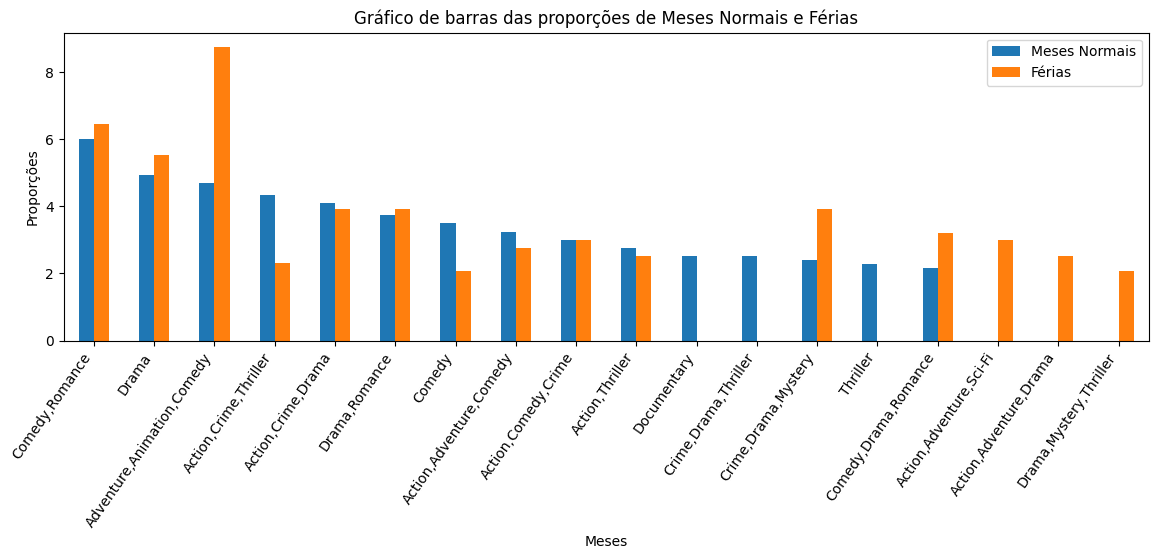

In [ ]:
# Vamos plotar o Gráfico de barras
fig, ax = plt.subplots(figsize=(14, 4))
tabela_frequencia_2.plot(kind='bar', ax=ax)
plt.title('Gráfico de barras das proporções de Meses Normais e Férias')
plt.xlabel('Meses')
plt.ylabel('Proporções')
plt.xticks(rotation=55, ha='right')
plt.legend()
plt.show()

### Ao analisar os dados fornecidos, percebemos claramente algumas tendências distintas. Durante os meses normais, gêneros como Ação, Crime e Thriller('Suspense') ocupam uma parcela considerável do interesse dos espectadores, representando 4.34% do total de visualizações, enquanto durante as férias, esse número diminui drasticamente para 2.30%. Isso sugere que os espectadores tendem a procurar entretenimento mais leve e descontraído durante as férias, como Aventura, Animação e Comédia, que aumentam de 4.70% para 8.74%.

### Além disso, gêneros como Drama, Mistério e Crime e Comédia, Drama e Romance também parecem ter uma preferência ligeiramente maior durante as férias, indicando uma propensão dos espectadores para histórias mais instigantes quando têm mais tempo livre.

### E Durante os meses normais, alguns gêneros específicos como Ação, Aventura e Ficção científica, Ação, Aventura e Drama, Drama, Mistério, Thriller('Suspense') não apresentaram valores disponíveis. No entanto, durante os períodos de férias, esses gêneros começaram a ganhar visibilidade, com médias de 2.99, 2.53 e 2.07, respectivamente.

### Estas tendências de consumo podem ser em parte explicadas pela presença de crianças e adolescentes em casa devido às férias escolares, juntamente com seus familiares. É aqui que os gêneros de Aventura, Animação e Comédia se destacam, oferecendo entretenimento que possa ser desfrutado em conjunto.

### A Netflix com certeza monitora de perto estas tendências de consumo e preferências dos usuários, utilizando essas informações para dimensionar estrategicamente seu catálogo, atraindo e fidelizando mais clientes.
